<a href="https://colab.research.google.com/github/mystlee/2024_CSU_AI_class/blob/main/example_decision_tree_using_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**scikit-learn**을 이용한 decision tree 구성 예제

**entropy**와 **Gini 불순도**를 이용한 예시

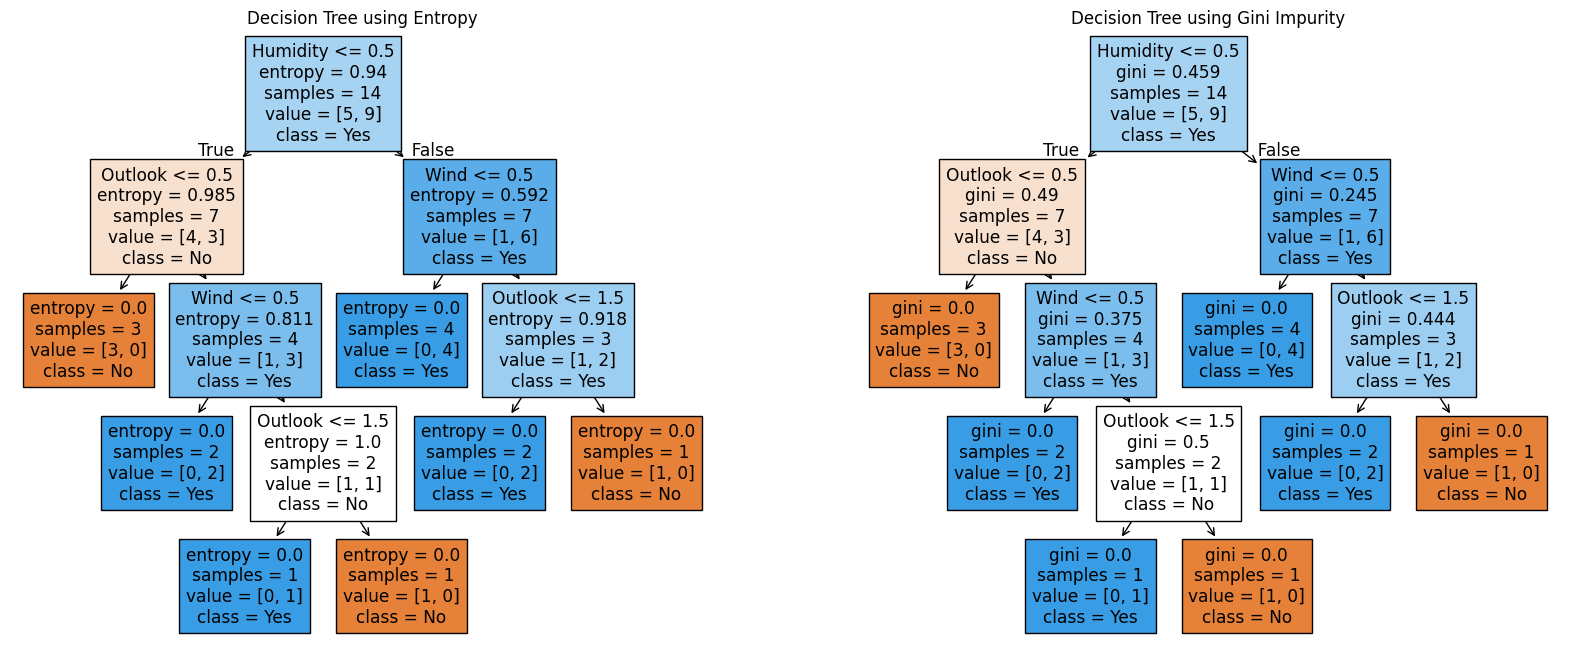

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# # 데이터 준비
# 관측 데이터: Outlook, Temperature, Humidity, Wind
# 결과 데이터: PlayTennis
data = {'Outlook':     ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain',
                        'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain',
                        'Sunny', 'Overcast', 'Overcast', 'Rain'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool',
                        'Cool', 'Cool', 'Mild', 'Cool', 'Mild',
                        'Mild', 'Mild', 'Hot', 'Mild'],
        'Humidity':    ['High', 'High', 'High', 'High', 'Normal',
                        'Normal', 'Normal', 'High', 'Normal', 'Normal',
                        'Normal', 'High', 'Normal', 'High'],
        'Wind':        ['Weak', 'Strong', 'Weak', 'Weak', 'Weak',
                        'Strong', 'Strong', 'Weak', 'Weak', 'Weak',
                        'Strong', 'Strong', 'Weak', 'Strong'],

        'PlayTennis':  ['No', 'No', 'Yes', 'Yes', 'Yes',
                        'No', 'Yes', 'No', 'Yes', 'Yes',
                        'Yes', 'Yes', 'Yes', 'No']}

df = pd.DataFrame(data)

# # 데이터 전처리
# class를 숫자로 표현
df['Outlook'] = df['Outlook'].map({'Sunny': 0, 'Overcast': 1, 'Rain': 2})
df['Temperature'] = df['Temperature'].map({'Hot': 0, 'Mild': 1, 'Cool': 2})
df['Humidity'] = df['Humidity'].map({'High': 0, 'Normal': 1})
df['Wind'] = df['Wind'].map({'Weak': 0, 'Strong': 1})

x = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]  # 입력 데이터
y = df['PlayTennis']  # 출력 데이터

# training dataset과 test dataset으로 분할
split_ratio = 0.
if split_ratio > 0.:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
else:
  x_train, x_test, y_train, y_test = x, [], y, []

# 엔트로피(entropy)를 이용한 decision tree 생성
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_entropy = clf_entropy.fit(x_train, y_train)

# 지니 불순도(Gini Impurity)를 이용한 decision tree 생성
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
clf_gini = clf_gini.fit(x_train, y_train)

# 트리 시각화
plt.figure(figsize = (20, 8))

# (1) decision tree using entropy
plt.subplot(121)
plot_tree(clf_entropy, feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind'], class_names = ['No', 'Yes'], filled = True)
plt.title("Decision Tree using Entropy")

# (1) decision tree using Gini impurity
plt.subplot(122)
plot_tree(clf_gini, feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind'], class_names = ['No', 'Yes'], filled = True)
plt.title("Decision Tree using Gini Impurity")

plt.show()


학습된 두 종류의 **decision tree**를 이용한 inference

In [15]:
outlook_mapping = {'Sunny': 0, 'Overcast': 1, 'Rain': 2}
temperature_mapping = {'Hot': 0, 'Mild': 1, 'Cool': 2}
humidity_mapping = {'High': 0, 'Normal': 1}
wind_mapping = {'Weak': 0, 'Strong': 1}

def map_input_values(input_df):
    input_df['Outlook'] = input_df['Outlook'].map(outlook_mapping)
    input_df['Temperature'] = input_df['Temperature'].map(temperature_mapping)
    input_df['Humidity'] = input_df['Humidity'].map(humidity_mapping)
    input_df['Wind'] = input_df['Wind'].map(wind_mapping)
    return input_df

# Outlook은 'Rain', Temperature은 'Mild', Humidity은 'Normal', Windy은 'Strong' 일 때, 각각의 결과는??
input = pd.DataFrame({'Outlook': ['Overcast'], 'Temperature': ['Mild'], 'Humidity': ['Normal'], 'Wind': ['Strong']})
input = map_input_values(input)

# Model prediction using entropy
entropy_prediction = clf_entropy.predict(input)
print("Prediction using Entropy model:", entropy_prediction[0])

# Model prediction using Gini impurity
gini_prediction = clf_gini.predict(input)
print("Prediction using Gini Impurity model:", gini_prediction[0])

Prediction using Entropy model: Yes
Prediction using Gini Impurity model: Yes
